# Phase 4: Cholesterol Control Medication

Documentation: https://halllab.atlassian.net/wiki/spaces/IGEM/pages/85000193/Phase+4+Cholesterol+Control+Medication

In [1]:
import igem
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

rpy2 ModuleSpec(name='rpy2', loader=<_frozen_importlib_external.SourceFileLoader object at 0x317921f60>, origin='/Users/andrerico/Works/Projects/pbs_igem/.venv/lib/python3.10/site-packages/rpy2/__init__.py', submodule_search_locations=['/Users/andrerico/Works/Projects/pbs_igem/.venv/lib/python3.10/site-packages/rpy2'])


In [2]:
# define the path to the data folder
path = Path().resolve()
path_data = path / "data"

In [18]:
# Read NHANES Data
df_nhanes = igem.epc.load.from_csv(str(path_data) +  "/step_03_01_nhanes_data.csv", index_col='sample')
# Keep only the first sequence
df_nhanes = df_nhanes.loc[df_nhanes["sequence"] == 0]
df_nhanes.index = df_nhanes.index.astype(int)

# Read Medications Data
df_medications = igem.epc.load.from_csv(str(path_data) +  "/step_04_01_Samples_with_medications.csv", index_col='sample')

/Users/andrerico/Works/Projects/pbs_igem/.venv/lib/python3.10/site-packages/igem/epc/clarite/load/load.py:77: DtypeWarning: Columns (442,869) have mixed types.Specify dtype option on import or set low_memory=False.
  return clarite.load.from_csv(filename, index_col, **kwargs)


Loaded 396,943 observations of 915 variables
Loaded 7,332 observations of 1 variables


#### STEP 04_00: Extract Data from MyNHANES

no code

#### STEP 04_01: Normalization Ratio to LDL and TC in Samples with Cholesterol Control Medications

Normalization of LDL and TC when Samples use Cholesterol Control Medications


In [20]:
# LDL and TC values are reduced by 30% and 20% respectively
df_nhanes['LBDLDL_N'] = df_nhanes.apply(lambda row: row['LBDLDL'] / 0.7 if row.name in df_medications.index else row['LBDLDL'], axis=1)
df_nhanes['LBXTC_N'] = df_nhanes.apply(lambda row: row['LBXTC'] / 0.8 if row.name in df_medications.index else row['LBXTC'], axis=1)

In [23]:
# Save the data to next Phase
df_nhanes.to_csv(str(path_data) + "/step_04_02_nhanes_data_with_medications.csv")

-------------------------------------------------

#### Distribution Data 

Samples that were normalized due to the use of Cholesterol Medication

In [24]:
# Plotting the data organized by Cycle and Group
ordered_columns = ['No Cholesterol Data', 'Cholesterol No Medication', 'Cholesterol Medication']
# Colors for the bars
colors = ['#b26277', '#6277b2', '#62b29d']

In [25]:
# Categorization of samples into three groups to LDL Cholesterol
df_nhanes['Group_LBDLDL'] = df_nhanes.apply(
    lambda row: 'No Cholesterol Data' if pd.isna(row['LBDLDL']) else (
        'Cholesterol No Medication' if row.name not in df_medications.index else 'Cholesterol Medication'
    ), axis=1
)
# Count of samples per cycle and group
grouped_ldl = df_nhanes.groupby(['Cycle', 'Group_LBDLDL']).size().unstack(fill_value=0)
grouped_ldl = grouped_ldl[ordered_columns]

# Categorization of samples into three groups to LDL Cholesterol
df_nhanes['Group_LBXTC'] = df_nhanes.apply(
    lambda row: 'No Cholesterol Data' if pd.isna(row['LBXTC']) else (
        'Cholesterol No Medication' if row.name not in df_medications.index else 'Cholesterol Medication'
    ), axis=1
)
# Count of samples per cycle and group
grouped_tc = df_nhanes.groupby(['Cycle', 'Group_LBXTC']).size().unstack(fill_value=0)
grouped_tc = grouped_tc[ordered_columns]

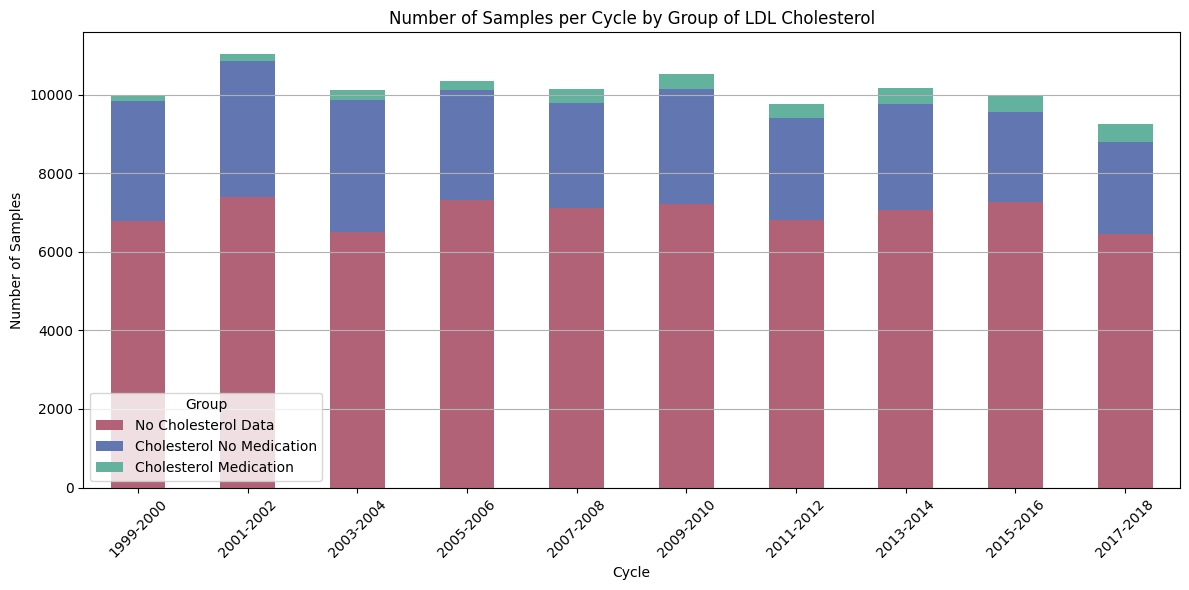

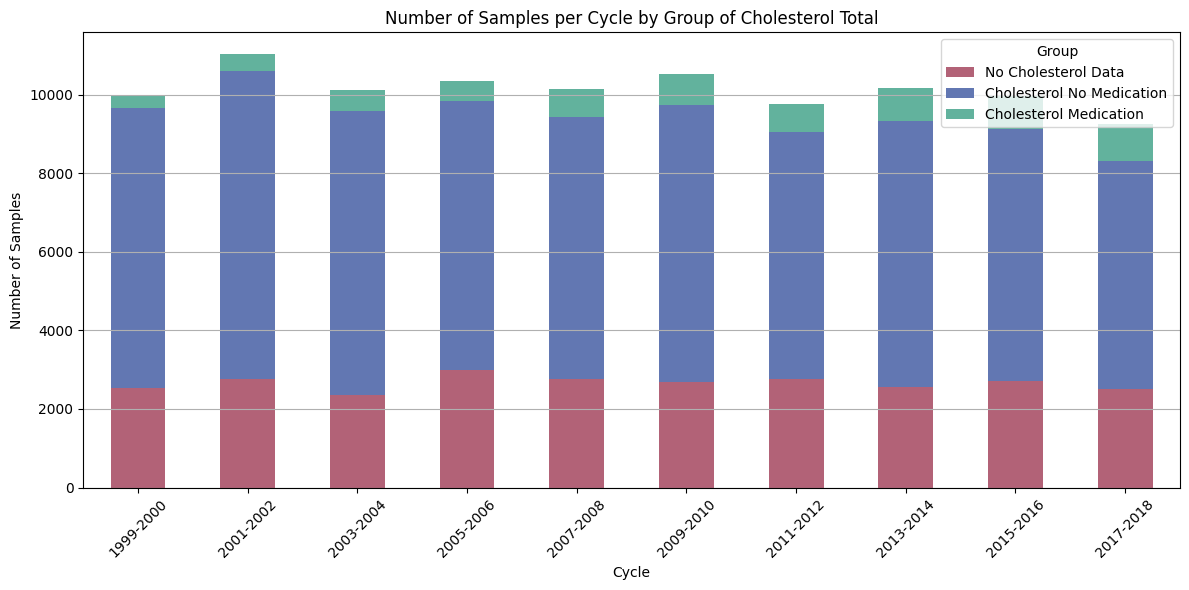

In [26]:
# PLORING THE DATA
grouped_ldl.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.xlabel('Cycle')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Cycle by Group of LDL Cholesterol')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# PLORING THE DATA
grouped_tc.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.xlabel('Cycle')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Cycle by Group of Cholesterol Total')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Distribution of Samples with use one of these drugs:

- ATORVASTATIN_CALCIUM
- SIMVASTATIN
- PRAVASTATIN_SODIUM
- FLUVASTATIN_SODIUM

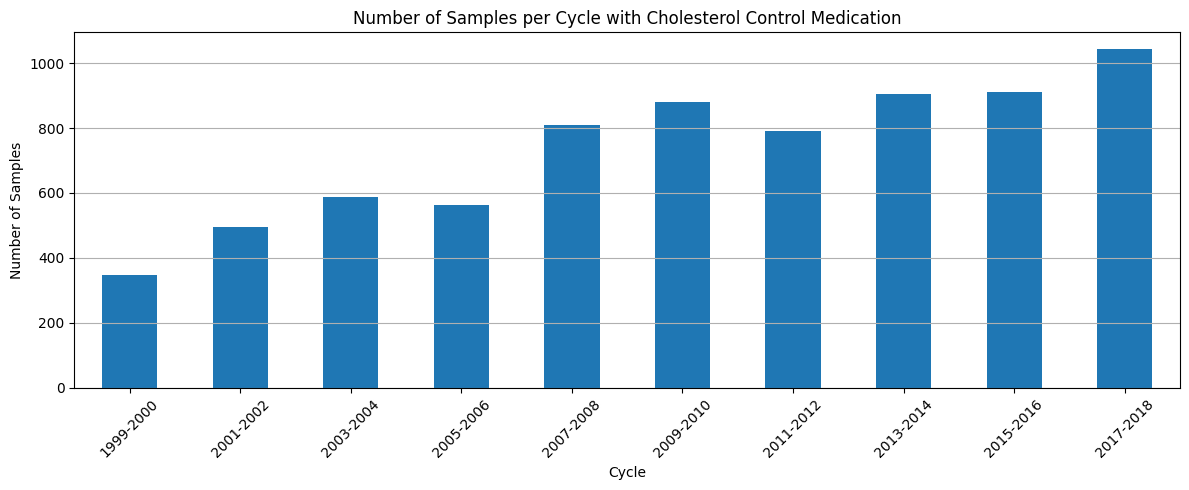

In [27]:
cycle_counts = df_medications['Cycle'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
cycle_counts.plot(kind='bar')
plt.xlabel('Cycle')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Cycle with Cholesterol Control Medication')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()